

*   Alumno : Davicho
*   E-mail : davidbrnarmu@gmail.com
*   Curso : Aprendizaje Automatico
*   Nombre Del Modelo : Random Forest




### **1. Carga de Modulos**

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from scipy.io import arff
import random
from collections import OrderedDict
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from tabulate import tabulate
import warnings
import joblib
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def tabla_resultados(resultados):
  df = pd.DataFrame.from_dict(resultados, orient='index')
  display(df)
  return df

In [3]:
def save_and_show_resultados(descripcion, model, resultados, X_train, X_test, y_train, y_test):
  y_train_pred = model.predict(X_train)
  y_train_pred_proba = model.predict_proba(X_train)[:,1]

  y_test_pred = model.predict(X_test)
  y_test_pred_proba = model.predict_proba(X_test)[:,1]

  confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
  confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

  resultados.update( { descripcion: {
      ('Entrenamiento', 'Exactitud'): model.score(X_train, y_train),
      ('Entrenamiento', 'Exhaustividad'): recall_score(y_train, y_train_pred),
      ('Entrenamiento', 'F1'): f1_score(y_train, y_train_pred),
      ('Entrenamiento', 'AUC'): roc_auc_score(y_train, y_train_pred_proba),
      ('Entrenamiento', 'TypeI'): confusion_matrix_train[0][1],
      ('Pruebas', 'Exactitud'): model.score(X_test, y_test),
      ('Pruebas', 'Exhaustividad'): recall_score(y_test, y_test_pred),
      ('Pruebas', 'F1'): f1_score(y_test, y_test_pred),
      ('Pruebas', 'AUC'): roc_auc_score(y_test, y_test_pred_proba),
      ('Pruebas', 'TypeI'): confusion_matrix_test[0][1]
    } } )
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))
  fig.suptitle(f'{descripcion} (Conjunto de Pruebas)')
  plot_confusion_matrix(model, X_test, y_test, ax=axes[0], values_format='d')
  plot_roc_curve(model, X_test, y_test, ax=axes[1], name=descripcion)
  plot_precision_recall_curve(model, X_test, y_test, ax=axes[2], name=descripcion)
  return

In [4]:
# función para separar las columnas en variables y etiquetas ('flag')
def split_features_labels(df):
    feature_dfs = df.iloc[:, :-1]
    label_dfs = df['flag']
    return feature_dfs, label_dfs

In [5]:
# Modelamiento de la data usando un diccionario de datasets y modelos
def perform_data_evaluation(modelos, imputed_df):
    # to show table
    resultados = {}

    # hacemos la division del dataframe en variables y etiquetas
    X, y = split_features_labels(imputed_df)

    # Dividimos la data en test y train
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 1)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.2,random_state=1)
    # Iteramos sobre los clasificadores
    for model_name, clf in modelos.items():
       
        # actualiza resultados
        save_and_show_resultados(model_name, clf, resultados, X_train, X_test, y_train, y_test)

    # presentamos la tabla resumen
    tabla_results = tabla_resultados(resultados)

    return tabla_results

### **2. Lectura Inicial de datos**

#### 2.1. Carga de datos

In [7]:
# Se carga el dataset normalizado
df_bankruptcy = pd.read_pickle(os.path.join('results','dataset_normalizado.pkl'))
df_bankruptcy.shape

(6819, 95)

In [8]:
df_bankruptcy.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X95,flag
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.024430,-0.020161,-0.545256,-0.006147,-0.829388,-1.279247,-1.275228,-1.276147,-1.794106,-0.671081,-0.473328,-0.471371,-1.375150,-0.025299,0.019997,-0.012031,-0.012262,-0.010299,-0.015599,-0.029426,-0.119118,-0.769297,-0.544227,-0.537245,-0.092520,0.669337,1.750845,-1.750845,-0.133505,0.959784,0.041865,-0.471275,-1.460495,-0.332027,-0.540344,-0.022345,-0.220988,-0.049648,-0.091259,-0.155185,-0.024481,-0.237123,0.531919,-2.393729,-1.155833,-1.520572,-0.861820,-0.522777,-0.411257,1.126267,-0.563752,-0.045371,-0.322681,-0.412896,-1.245334,0.568487,0.929946,-1.232594,-0.043610,1.314027,-0.035318,-0.028333,-0.019619,-0.032060,0.003948,0.873910,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-0.034272,-2.254317,0.017106,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,1.0
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.011828,-0.020161,-0.326632,-0.010887,-0.829388,-0.251878,-0.250429,-0.251550,-0.597379,-0.303533,-0.394059,-0.550058,-0.435312,-0.027130,0.010035,0.039473,0.039663,-0.001930,-0.014673,-0.019956,0.027847,-0.143117,-0.385042,-0.382868,0.372093,0.227253,1.075727,-1.075727,-0.132282,0.129305,-0.010932,-0.548362,-0.446793,-0.355356,-0.762702,-0.054370,-0.145897,-0.054423,-0.093409,-0.357471,-0.512419,-0.277557,-0.091616,-1.067133,-1.351081,-1.558280,-0.783873,-0.408213,-0.371984,-0.670363,-0.361990,1.169887,-0.153337,-2.192039,-0.328953,-0.123797,0.847028,-0.143474,-0.026740,-0.135126,-0.032610,-0.027435,-0.010126,-0.030558,0.004193,1.096932,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,-0.034272,-0.309033,-0.009316,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,1.0
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.015949,-0.019950,-0.523098,-0.002198,-0.829388,-0.381876,-0.380102,0.090822,-1.450153,-0.930172,-0.730201,-0.599601,-1.252562,0.029163,0.010605,0.022853,0.022981,-0.003748,-0.013708,-0.023759,-0.006595,-0.519094,-0.150904,-0.311547,-0.120983,0.668417,1.749724,-1.749724,-0.130825,0.272560,0.048714,-0.599655,-1.126595,0.309321,-1.251890,-0.041683,-0.182142,-0.059125,-0.095595,-0.687284,-0.116919,-0.571652,3.143718,0.260402,-0.296712,0.369252,-0.884109,-0.292192,-0.414239,0.148933,-0.486462,0.005772,0.198405,-1.526996,0.591934,0.249651,-0.172428,-0.971327,-0.040430,-0.287204,0.092491,0.046664,0.055319,-0.031835,0.004340,0.134076,-1.526996,0.249651,0.116638,-0.147060,-0.086679,-0.937979,-0.082328,-0.199721,-0.034272,-0.820510,0.924712,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,1.0
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,-0.025798,-0.020161,-0.101310,-0.022917,-0.829388,-1.092453,-1.088901,-1.089856,-1.055034,-0.102688,-0.543901,-1.121264,-1.077762,-0.029953,0.002370,-0.002641,-0.002910,-0.007039,-0.015682,-0.024902,-0.090968,0.212198,-0.462242,-0.445177,-0.067866,0.079447,0.710131,-0.710131,-0.132707,0.312459,-0.049430,-1.124902,-1.142029,-0.340373,-0.510696,-0.013107,-0.235297,-0.055629,-0.092462,-0.287110,-0.359022,-0.677748,0.134287,-1.496543,-1.181075,-1.359304,-0.755844,-0.471127,-0.383839,0.159921,-0.145444,-0.077837,-0.221077,-0.705262,-0.513105,0.007354,0.757254,-1.088734,-0.059344,-0.185032,-0.034474,-0.028722,-0.013113,-0.030899,-0.001243,1.548329,-0.705262,0.007354,0.261976,-1.492364,-0.445261,0.182559,-1.018533,1.158899,-0.034272,-1.691222,-0.158822,

#### 5.1. Particion Muestral

In [9]:
dataset = df_bankruptcy
#Separamos la data, en variables independientes (x) y dependientes (y), para poder entrenar un árbol de clasificación
x = dataset.drop("flag", axis=1)

y = dataset["flag"]

In [10]:
#Mediante el método "train_test_split" usaremos el 20% de la data para probar el modelo. El parámetro "random state" nos sirve para
#poder replicar la misma separación
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [11]:
print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (5455, 94)
Test shape: (1364, 94)


#### 5.2. Algoritmos Machine Learning

In [12]:
#Entrenamos el árbol de clasificación
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
#medimos el accuracy de test
y_pred = model.predict(X_test)
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 97.2141%


In [14]:
#medimos el accuracy de train
y_pred = model.predict(X_train)
predictions = y_pred
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 100.0000%


In [15]:
y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
auc = roc_auc_score(y_test, predictions)
f1_score_ = f1_score(y_test, predictions)
type1_error = confusion_matrix(y_test, predictions)[0][1]
print("Accuracy: %.4f" % (accuracy * 100.0))
print("ROC AUC: %.4f" % (auc))
print("F1-Score: %.4f" % (f1_score_))
print("Type I Error: %.1f" % (type1_error))

Accuracy: 97.2141
ROC AUC: 0.6231
F1-Score: 0.3667
Type I Error: 5.0


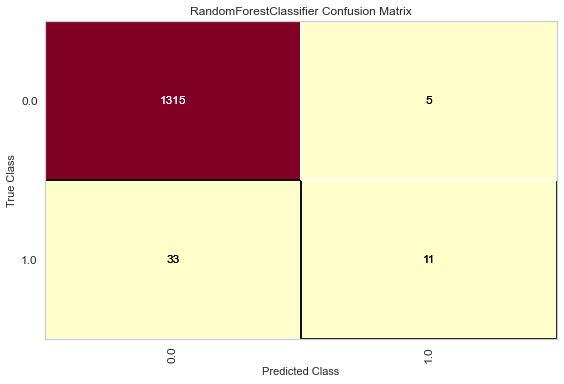

In [16]:
viz = ConfusionMatrix(model)
viz.score(X_test, y_test)
viz.draw()
viz.finalize()

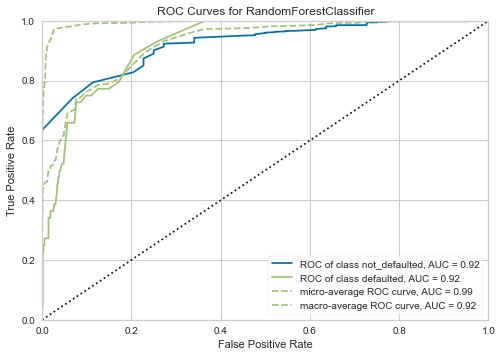

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['not_defaulted', 'defaulted'],
       estimator=RandomForestClassifier())

In [17]:
# Curva ROC- AUC
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(model, X_train, y_train, X_test=X_test, y_test=y_test, classes=['not_defaulted', 'defaulted'])

#### 5.2. Tunning de Algoritmos

In [18]:
from sklearn.model_selection import GridSearchCV

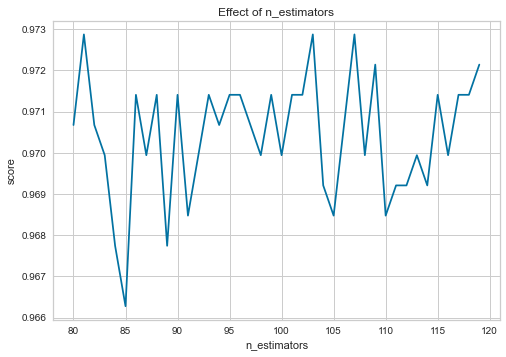

In [19]:
n_estimators = np.arange(80, 120, 1)
scores = []
for n in n_estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.plot(n_estimators, scores)

In [20]:
##Se observa una mejora en n_estimators entre 85 y 90
#Entrenamos el árbol de clasificación
model = RandomForestClassifier(n_estimators=89, max_depth=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=89)

In [21]:
#medimos el accuracy de test
y_pred = model.predict(X_test)
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Test: %.4f%%" % (accuracy * 100.0))
#medimos el accuracy de train
y_pred = model.predict(X_train)
predictions = y_pred
accuracy = accuracy_score(y_train, predictions)
print("Accuracy Train: %.4f%%" % (accuracy * 100.0))

Accuracy Test: 96.9208%
Accuracy Train: 97.2502%


#### Observamos que el train esta siendo impactado por la poca diversificacion de datos en la particion muestral del valor "flag" a predecir.

In [22]:
train = dataset
target = 'flag'
predictors = [x for x in train.columns if x not in [target]]


In [23]:
param_test1 = {
 'n_estimators':range(85,90,1),
 'criterion':("gini","entropy"),
 'max_depth':range(2,5,1)
}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.30782547, 1.35200291, 1.34931264, 1.37753487, 1.39111242,
         1.81316905, 1.82333198, 1.81747656, 1.84700241, 1.87305822,
         2.24949212, 2.25792255, 2.25948944, 2.28325281, 2.29324546,
         1.92401948, 1.94867172, 1.92025728, 1.99280047, 2.01734543,
         2.65608368, 2.68769579, 2.70236411, 2.76840205, 2.77994962,
         3.28847523, 3.31298318, 3.32861037, 3.41304097, 2.92684774]),
  'std_fit_time': array([0.027592  , 0.03877226, 0.01782417, 0.04364012, 0.02586891,
         0.03514175, 0.02147913, 0.03098391, 0.02566684, 0.04465654,
         0.02274706, 0.04090217, 0.05223087, 0.02419822, 0.02050049,
         0.05664479, 0.02761175, 0.03051592, 0.02574894, 0.02882635,
         0.02118207, 0.031887  , 0.02407338, 0.03717873, 0.0307648 ,
         0.07093105, 0.07266302, 0.07120949, 0.06921626, 0.24226361]),
  'mean_score_time': array([0.04442582, 0.03859   , 0.04062271, 0.04341145, 0.04600263,
         0.0377511 , 0.03862653, 0.04122682, 0.

In [23]:
##Sin embargo se observa que el mejor valor para el n_estimators=94,criterion="entropy"
#Entrenamos el árbol de clasificación final
model_RF = RandomForestClassifier(n_estimators=89,criterion="entropy",max_depth=3)
model_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=89)

In [24]:
#medimos el accuracy de test
y_pred = model_RF.predict(X_test)
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Test: %.4f%%" % (accuracy * 100.0))
#medimos el accuracy de train
y_pred = model_RF.predict(X_train)
predictions = y_pred
accuracy = accuracy_score(y_train, predictions)
print("Accuracy Train: %.4f%%" % (accuracy * 100.0))

Accuracy Test: 96.7742%
Accuracy Train: 97.0852%


##### 5.3. Exportamos el mejor modelo

In [25]:
#Guardamos el mejor modelo
joblib.dump(model_RF, os.path.join('modelos','Modelo_RF.pkl'))

['modelos\\Modelo_RF.pkl']

In [26]:
# Cargamos el mejor modelo, entrenado y optimizado
model_RF = joblib.load(os.path.join('modelos','Modelo_RF.pkl'))

In [27]:
model_RF

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=89)

In [28]:

rf_model = joblib.load(os.path.join('modelos','Modelo_RF.pkl'))

In [29]:
# se carga dataset imputado
imputed_df = pd.read_pickle(os.path.join('results','dataset_normalizado.pkl'))

In [30]:
models_dictionary2 = OrderedDict()
models_dictionary2['RF'] = rf_model

Entrenamiento                                           Pruebas                                        
       Exactitud Exhaustividad        F1       AUC TypeI Exactitud Exhaustividad        F1       AUC TypeI
RF      0.970486      0.085227  0.157068  0.955802     0  0.969208      0.045455  0.086957  0.943457     0

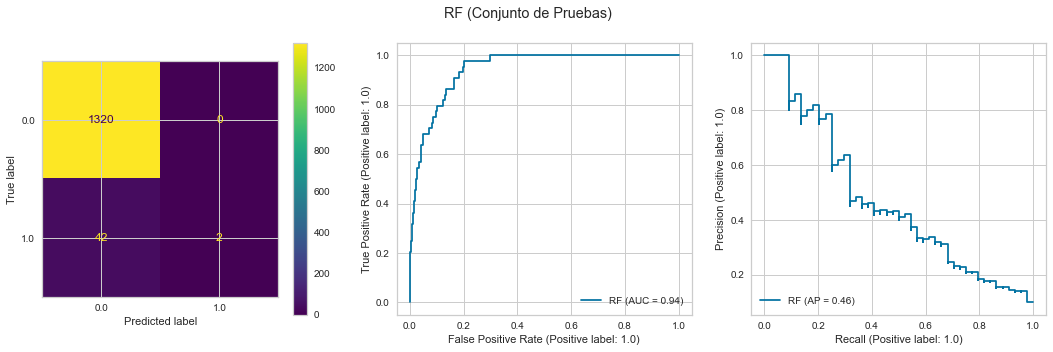

In [31]:
# Reviamos
metricas = perform_data_evaluation(models_dictionary2, imputed_df)